<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Conv1D, MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 45s 72ms/step - loss: 0.6212 - accuracy: 0.5936 - val_loss: 0.3100 - val_accuracy: 0.8660
Epoch 2/100
176/176 [==============================] - 11s 64ms/step - loss: 0.2553 - accuracy: 0.9018 - val_loss: 0.2989 - val_accuracy: 0.8744
Epoch 3/100
176/176 [==============================] - 11s 64ms/step - loss: 0.1926 - accuracy: 0.9290 - val_loss: 0.2814 - val_accuracy: 0.8844
Epoch 4/100
176/176 [==============================] - 11s 64ms/step - loss: 0.1522 - accuracy: 0.9469 - val_loss: 0.2841 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 11s 64ms/step - loss: 0.1412 - accuracy: 0.9508 - val_loss: 0.3296 - val_accuracy: 0.8800
Epoch 6/100
176/176 [==============================] - 11s 64ms/step - loss: 0.0981 - accuracy: 0.9688 - val_loss: 0.3371 - val_accuracy: 0.8812
Epoch 7/100
176/176 [==============================] - 11s 64ms/step - loss: 0.0703 - accuracy: 0.9784 - val_loss

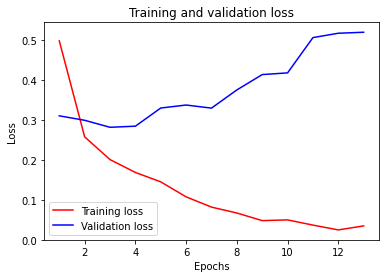

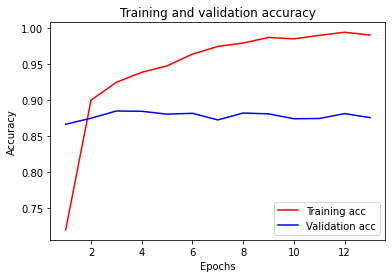

              precision    recall  f1-score   support

           0      0.877     0.893     0.885     12500
           1      0.891     0.874     0.883     12500

    accuracy                          0.884     25000
   macro avg      0.884     0.884     0.884     25000
weighted avg      0.884     0.884     0.884     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 14s 68ms/step - loss: 0.6565 - accuracy: 0.5817 - val_loss: 0.3514 - val_accuracy: 0.8508
Epoch 2/100
176/176 [==============================] - 11s 64ms/step - loss: 0.2804 - accuracy: 0.8897 - val_loss: 0.2850 - val_accuracy: 0.8768
Epoch 3/100
176/176 [==============================] - 11s 64ms/step - loss: 0.1999 - accuracy: 0.9269 - val_loss: 0.2953 - val_accuracy: 0.8764
Epoch 4/100
176/176 [==============================] - 11s 64ms/step - loss: 0.1651 - accuracy: 0.9421 - val_loss: 0.3110 - val_accuracy: 0.8768
Epoch 5/100
176/176 [==============================] - 11s 64ms/step - loss

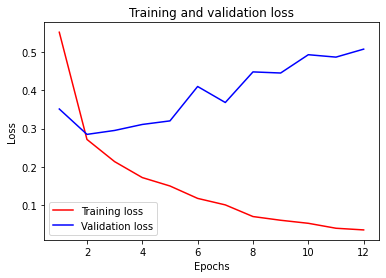

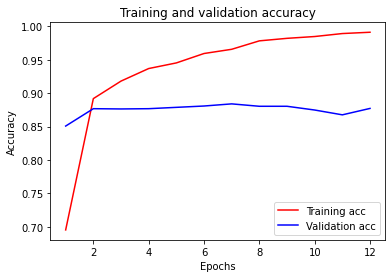

              precision    recall  f1-score   support

           0      0.880     0.880     0.880     12500
           1      0.880     0.880     0.880     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 14s 69ms/step - loss: 0.6299 - accuracy: 0.6073 - val_loss: 0.3505 - val_accuracy: 0.8616
Epoch 2/100
176/176 [==============================] - 11s 65ms/step - loss: 0.2983 - accuracy: 0.8797 - val_loss: 0.2924 - val_accuracy: 0.8780
Epoch 3/100
176/176 [==============================] - 11s 65ms/step - loss: 0.2030 - accuracy: 0.9231 - val_loss: 0.2740 - val_accuracy: 0.8956
Epoch 4/100
176/176 [==============================] - 11s 65ms/step - loss: 0.1757 - accuracy: 0.9335 - val_loss: 0.2762 - val_accuracy: 0.8908
Epoch 5/100
176/176 [==============================] - 11s 65ms/step - loss

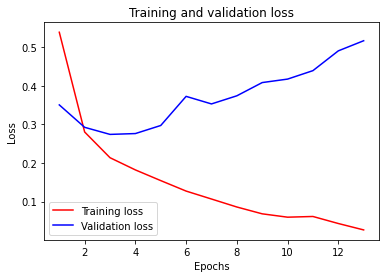

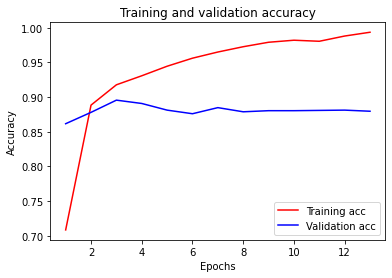

              precision    recall  f1-score   support

           0      0.882     0.889     0.885     12500
           1      0.888     0.881     0.885     12500

    accuracy                          0.885     25000
   macro avg      0.885     0.885     0.885     25000
weighted avg      0.885     0.885     0.885     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 15s 72ms/step - loss: 0.6184 - accuracy: 0.6039 - val_loss: 0.3301 - val_accuracy: 0.8676
Epoch 2/100
176/176 [==============================] - 11s 65ms/step - loss: 0.2686 - accuracy: 0.8954 - val_loss: 0.3088 - val_accuracy: 0.8700
Epoch 3/100
176/176 [==============================] - 11s 65ms/step - loss: 0.1910 - accuracy: 0.9269 - val_loss: 0.3016 - val_accuracy: 0.8824
Epoch 4/100
176/176 [==============================] - 11s 65ms/step - loss: 0.1563 - accuracy: 0.9448 - val_loss: 0.3301 - val_accuracy: 0.8820
Epoch 5/100
176/176 [==============================] - 11s 65ms/step - loss

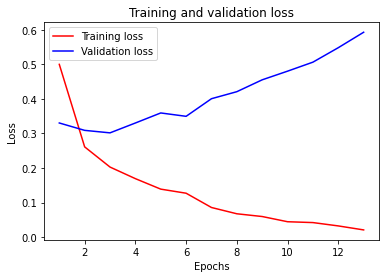

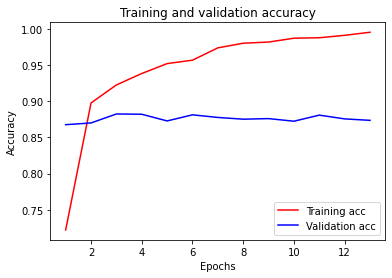

              precision    recall  f1-score   support

           0      0.900     0.853     0.876     12500
           1      0.860     0.905     0.882     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 14s 70ms/step - loss: 0.6134 - accuracy: 0.6162 - val_loss: 0.3178 - val_accuracy: 0.8624
Epoch 2/100
176/176 [==============================] - 11s 65ms/step - loss: 0.2717 - accuracy: 0.8949 - val_loss: 0.2982 - val_accuracy: 0.8700
Epoch 3/100
176/176 [==============================] - 11s 65ms/step - loss: 0.2006 - accuracy: 0.9256 - val_loss: 0.2861 - val_accuracy: 0.8796
Epoch 4/100
176/176 [==============================] - 12s 66ms/step - loss: 0.1541 - accuracy: 0.9453 - val_loss: 0.2831 - val_accuracy: 0.8788
Epoch 5/100
176/176 [==============================] - 12s 65ms/step - loss

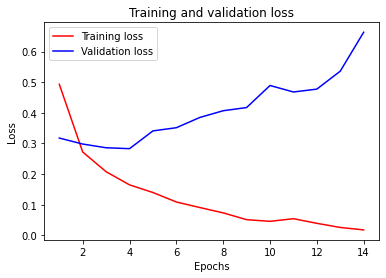

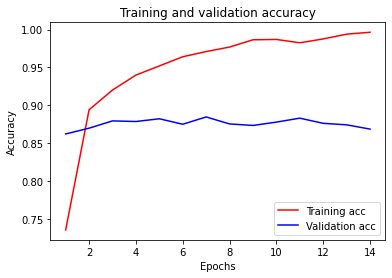

              precision    recall  f1-score   support

           0      0.891     0.872     0.881     12500
           1      0.874     0.894     0.884     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 15s 71ms/step - loss: 0.6557 - accuracy: 0.5972 - val_loss: 0.3771 - val_accuracy: 0.8348
Epoch 2/100
176/176 [==============================] - 12s 66ms/step - loss: 0.3386 - accuracy: 0.8612 - val_loss: 0.2861 - val_accuracy: 0.8784
Epoch 3/100
176/176 [==============================] - 12s 66ms/step - loss: 0.2244 - accuracy: 0.9114 - val_loss: 0.3026 - val_accuracy: 0.8740
Epoch 4/100
176/176 [==============================] - 12s 66ms/step - loss: 0.1800 - accuracy: 0.9331 - val_loss: 0.2780 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 12s 66ms/step - loss

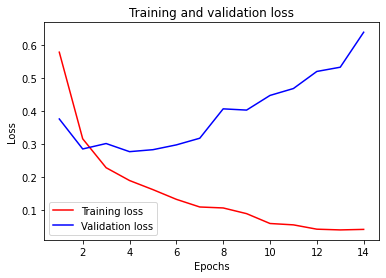

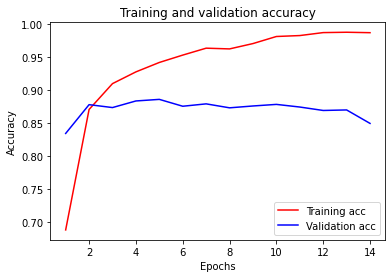

              precision    recall  f1-score   support

           0      0.874     0.886     0.880     12500
           1      0.884     0.872     0.878     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 15s 71ms/step - loss: 0.6279 - accuracy: 0.6094 - val_loss: 0.3256 - val_accuracy: 0.8648
Epoch 2/100
176/176 [==============================] - 12s 67ms/step - loss: 0.2640 - accuracy: 0.8964 - val_loss: 0.2756 - val_accuracy: 0.8944
Epoch 3/100
176/176 [==============================] - 12s 66ms/step - loss: 0.1947 - accuracy: 0.9275 - val_loss: 0.2862 - val_accuracy: 0.8968
Epoch 4/100
176/176 [==============================] - 12s 67ms/step - loss: 0.1615 - accuracy: 0.9412 - val_loss: 0.2946 - val_accuracy: 0.8884
Epoch 5/100
176/176 [==============================] - 12s 66ms/step - loss

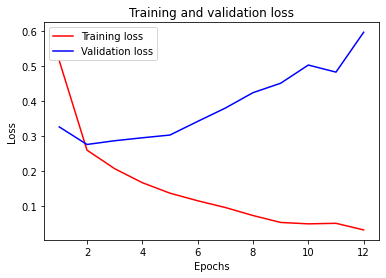

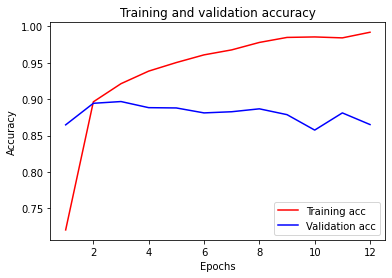

              precision    recall  f1-score   support

           0      0.878     0.896     0.887     12500
           1      0.894     0.876     0.885     12500

    accuracy                          0.886     25000
   macro avg      0.886     0.886     0.886     25000
weighted avg      0.886     0.886     0.886     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 15s 73ms/step - loss: 0.6579 - accuracy: 0.5705 - val_loss: 0.3587 - val_accuracy: 0.8464
Epoch 2/100
176/176 [==============================] - 12s 67ms/step - loss: 0.2982 - accuracy: 0.8738 - val_loss: 0.2773 - val_accuracy: 0.8824
Epoch 3/100
176/176 [==============================] - 12s 67ms/step - loss: 0.2216 - accuracy: 0.9148 - val_loss: 0.2755 - val_accuracy: 0.8876
Epoch 4/100
176/176 [==============================] - 12s 67ms/step - loss: 0.1649 - accuracy: 0.9409 - val_loss: 0.2968 - val_accuracy: 0.8920
Epoch 5/100
176/176 [==============================] - 12s 67ms/step - loss

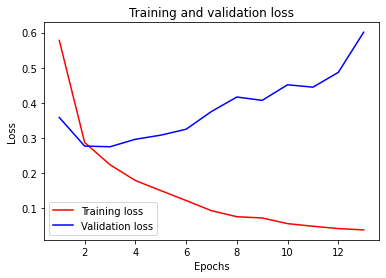

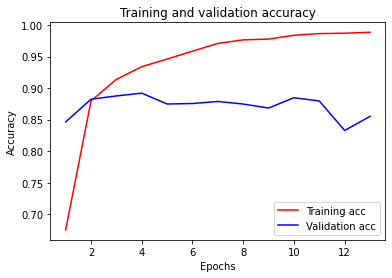

              precision    recall  f1-score   support

           0      0.908     0.850     0.878     12500
           1      0.859     0.914     0.886     12500

    accuracy                          0.882     25000
   macro avg      0.884     0.882     0.882     25000
weighted avg      0.884     0.882     0.882     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 15s 72ms/step - loss: 0.6329 - accuracy: 0.5989 - val_loss: 0.3177 - val_accuracy: 0.8656
Epoch 2/100
176/176 [==============================] - 12s 67ms/step - loss: 0.2879 - accuracy: 0.8857 - val_loss: 0.2741 - val_accuracy: 0.8908
Epoch 3/100
176/176 [==============================] - 12s 67ms/step - loss: 0.2056 - accuracy: 0.9238 - val_loss: 0.2703 - val_accuracy: 0.8868
Epoch 4/100
176/176 [==============================] - 12s 67ms/step - loss: 0.1682 - accuracy: 0.9384 - val_loss: 0.2903 - val_accuracy: 0.8804
Epoch 5/100
176/176 [==============================] - 12s 67ms/step - loss

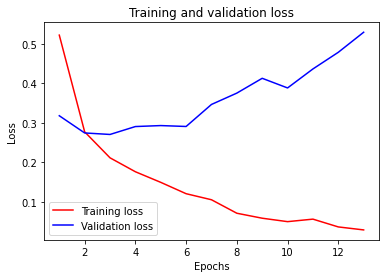

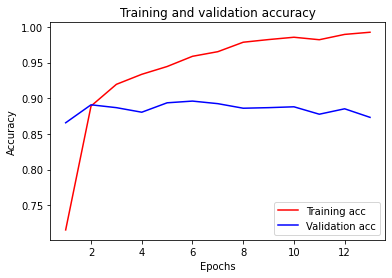

              precision    recall  f1-score   support

           0      0.861     0.908     0.884     12500
           1      0.903     0.854     0.878     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 15s 72ms/step - loss: 0.6552 - accuracy: 0.5657 - val_loss: 0.3528 - val_accuracy: 0.8528
Epoch 2/100
176/176 [==============================] - 12s 68ms/step - loss: 0.3034 - accuracy: 0.8777 - val_loss: 0.2952 - val_accuracy: 0.8756
Epoch 3/100
176/176 [==============================] - 12s 68ms/step - loss: 0.2143 - accuracy: 0.9207 - val_loss: 0.2768 - val_accuracy: 0.8872
Epoch 4/100
176/176 [==============================] - 12s 68ms/step - loss: 0.1913 - accuracy: 0.9326 - val_loss: 0.2783 - val_accuracy: 0.8880
Epoch 5/100
176/176 [==============================] - 12s 68ms/step - los

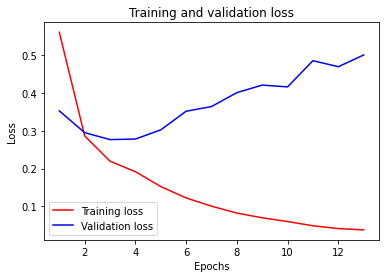

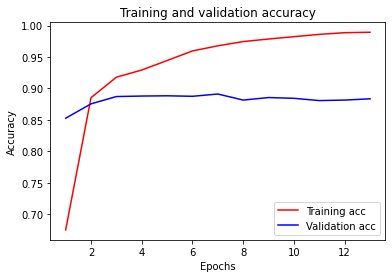

              precision    recall  f1-score   support

           0      0.869     0.888     0.879     12500
           1      0.886     0.866     0.876     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


Average accuracy: 0.8815 (+/- 0.0027)
Average loss: 0.2878 (+/- 0.0042)
Average F1: 0.8815 (+/- 0.0032)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
